# Ridge Regression
hata kareler toplamını minimalize eden katsayıları bu katsayıalara ceza uygulayarak bulmaktır

* Aşırı öğrenmeye karşı dirençli
* Yanlıkır fakat varyansı düşüktür(Bazen yanlı modelleri daga çok tercih ederiz)
* Çok fazla paremetre olduğunda EKK ya göre daha iyidir
* çok boyutluluk şanetşne karşı çözüm sunar
* Çoklu bağlantı problemi olduğunda etkilidir
* Tüm değişkenler ile model kurar. ilgisiz değişkenlerş modelden çıkarmaz, katsayılarını sıfıra yakalştırır
* lambda kritik roldedir. iki terimin(fomuldeki) göreceli etkilerini kontrol etmeyi sağlar.
* lambda için iyi bir değer bulunması önemlidir bunun için cv yöntemi kullanılır 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
ms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,ms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
ridge=Ridge(alpha=0.1).fit(X_train, y_train)
ridge.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [5]:
# şimdi hocam ne dedik alpha değeri önemli
# ne yapıyordu bu alpha?
# katsayılara etki ederek anlamlılıkalrı ölçüsünde değerli olmayan değişkenleri sıfır yapmaktansa direkt çıkarmaktan etkisini sıfırlamaktansa
# sıfıra yaklaştırıyor
# şimdi kendimiz bir döngü ile çeşitli alpha değerlerini deniyeceğiz ve sonuçları görselleştiricez.

Text(0.5, 1.0, 'Düzenlileştirmenin bir fonksiyonu olarak Ridge katsayialri')

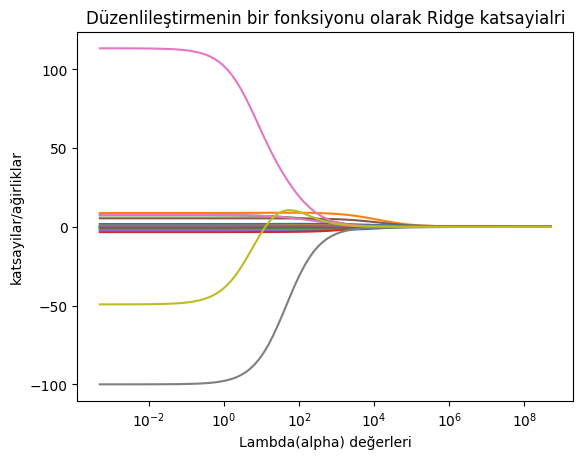

In [8]:
Lambdalar=10**np.linspace(10,-2,100)*0.05
ridge=Ridge()
coef=[]

for i in Lambdalar:
    ridge.set_params(alpha=i)
    ridge.fit(X_train, y_train)
    coef.append(ridge.coef_)

graph=plt.gca()
graph.plot(Lambdalar, coef)
graph.set_xscale("log")

plt.xlabel("Lambda(alpha) değerleri")
plt.ylabel("katsayilar/ağirliklar")
plt.title("Düzenlileştirmenin bir fonksiyonu olarak Ridge katsayialri")

# Tahmin

In [10]:
y_pred=ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.0531409274779